<a href="https://colab.research.google.com/github/Deskola/Deep-Learning-Projects/blob/master/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt

# **Loading the Data**

In [0]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [0]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
#checking the directories in the downloaded dataset
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
#Creating path objects using pathlib
path_annon = path/'annotations'
path_image = path/'images'

In [0]:
#getting all images in a path
fnames = get_image_files(path_image)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_123.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_66.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/samoyed_161.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_183.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_84.jpg')]

In [0]:
#Creating regular expression to extract target images
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_image, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
newfoundland,german_shorthaired,samoyed,japanese_chin,miniature_pinscher
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
staffordshire_bull_terrier,scottish_terrier,yorkshire_terrier,german_shorthaired,chihuahua
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

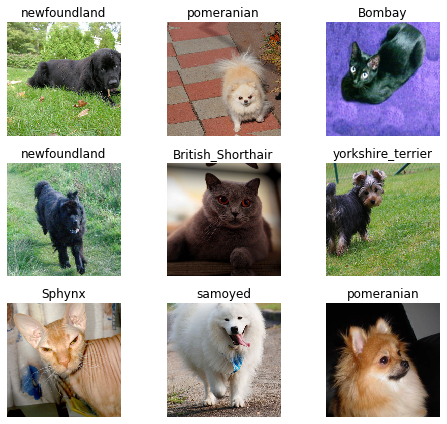

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
#Labels in the dataset
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

## **Training a Model: resnet34**

Now we start training our odel.  We will use a CNN backbone and a full connected head with a single hidden layer as a classifier. We are building a model which will take images as input and will output th predicted probability for each of the categories(in this cae it will have 37 output)

We will train for 5 epochs (5 cycles through all our data)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 23.8MB/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.425697,0.347272,0.109608,01:23
1,0.599927,0.282011,0.086604,01:22
2,0.397585,0.278847,0.088633,01:23
3,0.289736,0.238227,0.070365,01:23


## **Result**

We will first see were the categories that the model most confused with another. We will try to see if what the model predicted was reasonable or not. In this case, the mistakes look reasonable(none of the mstakes seems obviously naive). This is an indicator that our classifier is working correctly.

Furthermore, when we plot the confusion matrix, we see taht the distribution is the skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggestiion that its just finds it dificult to distiguish some specific categories between each other; this is normal behaviour

In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

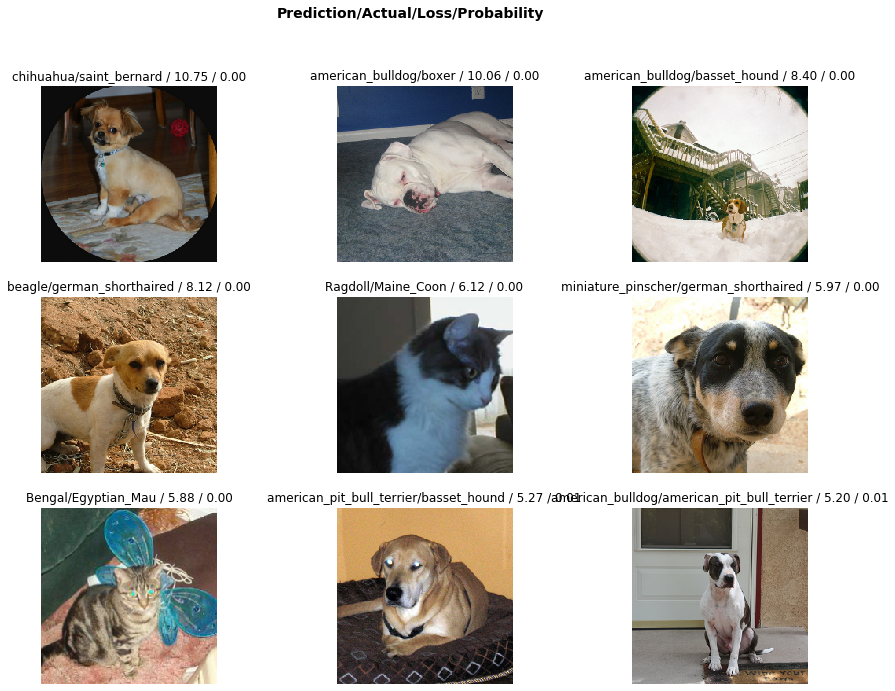

In [0]:
interp.plot_top_losses(9,figsize=(15,11))

In [0]:
#How to learn how to do something
doc(plot_to_losses)

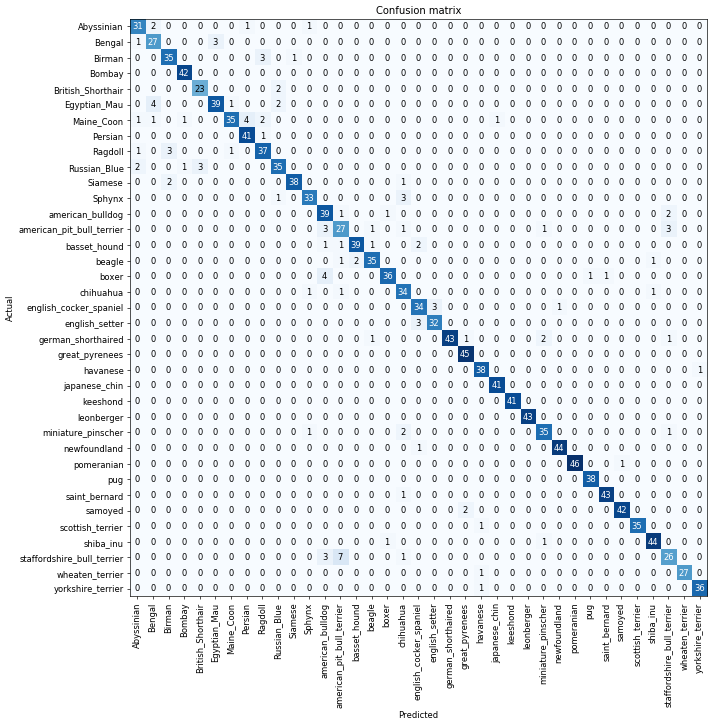

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 7),
 ('Egyptian_Mau', 'Bengal', 4),
 ('Maine_Coon', 'Persian', 4),
 ('boxer', 'american_bulldog', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Birman', 'Ragdoll', 3),
 ('Ragdoll', 'Birman', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('Sphynx', 'chihuahua', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('english_setter', 'english_cocker_spaniel', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('Abyssinian', 'Bengal', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Egyptian_Mau', 'Russian_Blue', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('basset_hound', 'english_cocker_spaniel', 2),
 ('beagle', 'basset_hound', 2),
 ('german_shorthaired', 'miniature_pinscher', 2),
 ('miniature

## **Unfreezing, fine-tuning and learning rates**

Since our model is working as we expected it to, we will unfreeze our model and traine some more


In [0]:
#training the whole model
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.678065,0.362348,0.116373,01:32


In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
newfoundland,german_shorthaired,samoyed,japanese_chin,miniature_pinscher
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
staffordshire_bull_terrier,scottish_terrier,yorkshire_terrier,german_shorthaired,chihuahua
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


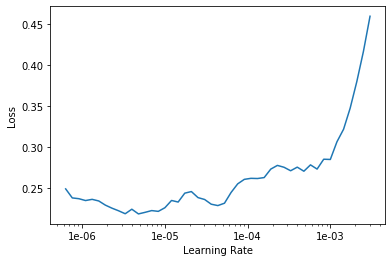

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.239822,0.228699,0.078484,01:29
1,0.231812,0.222763,0.074425,01:28


## **Other Dataset**

In [0]:
  path2 = untar_data(URLs.MNIST_SAMPLE);path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
(path2/'train').ls()

[PosixPath('/root/.fastai/data/mnist_sample/train/7'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3')]

In [0]:
tfms = get_transforms(do_flip=False)
data2 = ImageDataBunch.from_folder(path2, ds_tfms=tfms,size=224)

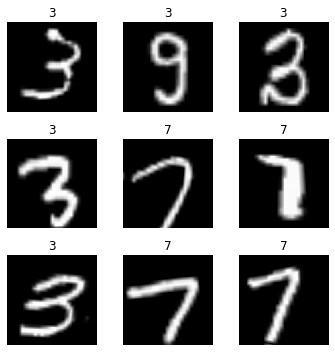

In [0]:
data2.show_batch(rows=3, figsize=(5,5))

In [0]:
df = pd.read_csv(path2/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data3 = ImageDataBunch.from_csv(path2,ds_tfms=tfms,size=28)

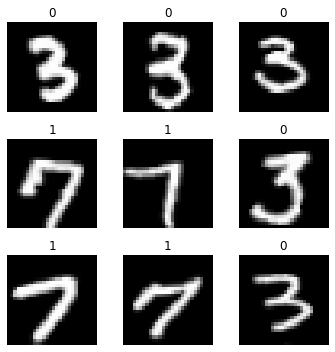

In [0]:
data3.show_batch(rows=3,figsize=(5,5))

In [0]:
learn

total 16
drwxr-xr-x 1 root root 4096 Dec 18 16:52 ./
drwxr-xr-x 1 root root 4096 Jan 12 08:18 ../
drwxr-xr-x 1 root root 4096 Jan  8 16:41 .config/
drwxr-xr-x 1 root root 4096 Dec 18 16:52 sample_data/
